In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
def sign(x):
    if x >= 0:
        return 1
    else:
        return -1
    
def random_weights(N):
    W = np.random.normal(loc=0.0, scale=1.0, size=(N,N))
    #W = 0.5 * (W + W.T)
    return W

class Hopfield():
    
    def __init__(self, NoNeoros):
        self.no = NoNeoros
        self.weights = np.zeros((self.no,self.no))
    
    def fit(self, patterns, scaling=False, random_w=False, sparse=False, activity=0):
       
        if sparse: 
            activitiy = np.ones(patterns.shape)*activity
            patterns = patterns - activity
            
        if random_w:
            self.weights = random_weights(self.no)    
        else:
            for p in range(patterns.shape[0]):
                self.weights += np.outer(patterns[p,:].T,patterns[p,:]) 
                #print(self.weights)
            for i in range(self.no):
                self.weights[i,i] = 0
            if scaling:
                self.weights /= self.no 
            
    def sync_update(self, x):
        output = None
        output = np.dot(self.weights,x)
        #print(output)
        for i in range(len(output)):
            output[i] = sign(output[i])
        return output
        
    def async_update(self,x):
        N = self.no
        new = np.copy(x)
        for i in range(N):
            sum_ = 0
            for j in range(N):
                sum_ += np.multiply(self.weights[i][j], new[j])
            if sum_ < 0:
                new[i] = -1
            else:
                new[i] = 1
                
            #if i%100 == 0:
             #   self.plot(new)
        return new
    
    def sparse_update(self,x,theta):
        N = self.no
        new = np.copy(x)
        for i in range(N):
            sum_ = 0
            for j in range(N):
                sum_ += np.multiply(self.weights[i][j], new[j])
            if (sum_- theta) < 0:
                new[i] = 0
            else:
                new[i] = 1
        return new
        
    def random_update(self, x):
        N = self.no
        new = np.copy(x)
        for index in range(N):
            i = np.random.randint(0,N)
            sum_ = 0
            for j in range(N):
                sum_ += np.multiply(self.weights[i][j], new[j])
            if sum_ < 0:
                new[i] = -1
            else:
                new[i] = 1
                
            #if (index%1000 == 0 ):
        self.plot(new)
        return new 
    
    def update_rule(self, x, rule='sync',theta=0.1, max_iter=30):
        error = 1
        iter_count = 0
        energy = []
        
        while error > 0:
            if rule == 'sync' :
                new = self.sync_update(x)
            #print(new)
            elif rule == 'async':
                new = self.async_update(x)
                
            elif rule == 'random':
                new = self.random_update(x)
                
            elif rule == 'sparse':
                new = self.sparse_update(x,theta)
                
            error = sum(abs(new-x))
            x = new.copy()
            iter_count += 1
            
            energy.append(self.energy(x))
            
            if iter_count == max_iter:
                break
        return x, iter_count, energy
    
    def energy(self, x):
        matrix = self.weights * np.outer(x.T, x)  
        engery = np.sum(matrix)
        return -engery
        
    def plot(self, patterns):
        plt.imshow(patterns.reshape(32,32),cmap='gray', interpolation='nearest')
        plt.show()

        

In [75]:
x1 = np.array([-1,-1,1,-1,1,-1,-1,1], dtype=float)
x2 = np.array([-1,-1,-1,-1,-1,1,-1,-1],dtype=float)
x3 = np.array([-1,1,1,-1,-1,1,-1,1],dtype=float)
patterns  = np.array([x1,x2,x3])

In [23]:
hf = Hopfield(8)
hf.fit(patterns,scaling= False)

In [24]:
energy = []
for x in patterns:
    recover, iters, e = hf.update_rule(x,'sync')
    energy.append(e)
    print('Old pattern was ', x ,'updated pattern is' ,recover,'iterations is',iters)
    if (np.array_equal(x, recover)):
        print('They are same')

Old pattern was  [-1. -1.  1. -1.  1. -1. -1.  1.] updated pattern is [-1. -1.  1. -1.  1. -1. -1.  1.] iterations is 1
They are same
Old pattern was  [-1. -1. -1. -1. -1.  1. -1. -1.] updated pattern is [-1. -1. -1. -1. -1.  1. -1. -1.] iterations is 1
They are same
Old pattern was  [-1.  1.  1. -1. -1.  1. -1.  1.] updated pattern is [-1.  1.  1. -1. -1.  1. -1.  1.] iterations is 1
They are same


# energy

In [6]:
x1d = np.array([1,-1, 1,-1, 1,-1,-1, 1], dtype=float)
x2d = np.array([1, 1,-1,-1,-1, 1,-1,-1], dtype=float)
x3d = np.array([1, 1, 1,-1, 1, 1,-1, 1], dtype=float)
patternsd = np.array([x1d,x2d,x3d])

In [7]:
energy = []
for x0,x1 in zip(patterns, patternsd):
    updateX1,iters,e = hf.update_rule(x1,'sync')
    energy.append(e)
    print('Old pattern was ', x0 ,'updated pattern is', updateX1,'iterations is',iters)
    if (np.array_equal(x0, updateX1)):
        print('They are same')
    else:
        print('Not same')

Old pattern was  [-1. -1.  1. -1.  1. -1. -1.  1.] updated pattern is [-1. -1.  1. -1.  1. -1. -1.  1.] iterations is 2
They are same
Old pattern was  [-1. -1. -1. -1. -1.  1. -1. -1.] updated pattern is [ 1.  1. -1. -1. -1.  1. -1. -1.] iterations is 30
Not same
Old pattern was  [-1.  1.  1. -1. -1.  1. -1.  1.] updated pattern is [-1. -1.  1. -1.  1.  1. -1.  1.] iterations is 30
Not same


In [10]:
energy = []
for x0,x1 in zip(patterns, patternsd):
    updateX1,iters,e = hf.update_rule(x1,'async')
    energy.append(e)
    print('Old pattern was ', x0 ,'updated pattern is', updateX1,'iterations is',iters)
    if (np.array_equal(x0, updateX1)):
        print('They are same')
    else:
        print('Not same')

Old pattern was  [-1. -1.  1. -1.  1. -1. -1.  1.] updated pattern is [-1. -1.  1. -1.  1. -1. -1.  1.] iterations is 2
They are same
Old pattern was  [-1. -1. -1. -1. -1.  1. -1. -1.] updated pattern is [-1. -1. -1. -1. -1.  1. -1. -1.] iterations is 2
They are same
Old pattern was  [-1.  1.  1. -1. -1.  1. -1.  1.] updated pattern is [-1.  1.  1. -1. -1.  1. -1.  1.] iterations is 3
They are same


In [11]:
energy 

[[-44.0, -44.0], [-44.0, -44.0], [-44.0, -48.0, -48.0]]

In [ ]:
x3 == hf.update_rule(x3d,'async')[0]

# Search for actrractors

In [8]:

all_patterns = np.zeros((256,8))
for i in range(256):
    arr = [int(x) for x in bin(i)[2:]]
    for j in range(len(arr)):
        all_patterns[i][8 - len(arr) + j] = arr[j]
        
for i in range(256):
    for j in range(8):
        if all_patterns[i][j] == 0:
            all_patterns[i][j] = -1

In [9]:
all_patterns

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1.,  1.],
       [-1., -1., -1., ..., -1.,  1., -1.],
       ...,
       [ 1.,  1.,  1., ...,  1., -1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1., -1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

In [10]:
attractors = np.empty((256,8))
for i in range(all_patterns.shape[0]):
    ii = hf.update_rule(all_patterns[i],'async')[0]
    attractors[i] = ii
nunique = np.unique(attractors, axis=0).shape[0]
unique = np.unique(attractors, axis=0)
print("There are {} attractors in the net".format(nunique))
unique

There are 6 attractors in the net


array([[-1., -1., -1., -1., -1.,  1., -1., -1.],
       [-1., -1.,  1., -1.,  1., -1., -1.,  1.],
       [-1.,  1.,  1., -1., -1.,  1., -1.,  1.],
       [ 1., -1., -1.,  1.,  1., -1.,  1., -1.],
       [ 1.,  1., -1.,  1., -1.,  1.,  1., -1.],
       [ 1.,  1.,  1.,  1.,  1., -1.,  1.,  1.]])

# more than half is wrong

In [26]:
x1d_more = np.array([1,1,1,-1,-1,1,1,-1], dtype=float)
for i in range(3):
    if np.array_equal(patterns[i], hf.update_rule(x1d_more,'async')[0]):
        print('recover to pattern ', i )


# 1024 dimensions


In [52]:
Data = np.loadtxt('pict.dat.txt',delimiter=",", dtype=int).reshape(-1,1024)

In [53]:
Data.shape

(11, 1024)

In [54]:
patterns3 = Data[0:3].copy()

In [55]:
hf = Hopfield(1024)
hf.fit(patterns3)

In [56]:
for x in patterns3:
   # print("Old pattern was ", x ,"updated pattern is ",hf.update_rule(x,"sync")[0])
    if (np.array_equal(x, hf.update_rule(x,'sync')[0])):
        print('They are same')

They are same
They are same
They are same


In [57]:
for x in patterns3:
   # print("Old pattern was ", x ,"updated pattern is ",hf.update_rule(x,"sync")[0])
    if (np.array_equal(x, hf.update_rule(x,'async')[0])):
        print('They are same')

They are same
They are same
They are same


In [58]:
p1 = Data[0].copy()
p2 = Data[1].copy()
p3 = Data[2].copy()
p10 = Data[9].copy()
p11 = Data[10].copy()

# random picture for async

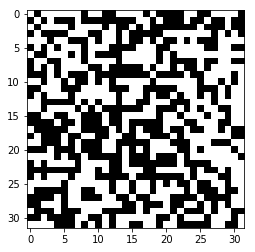

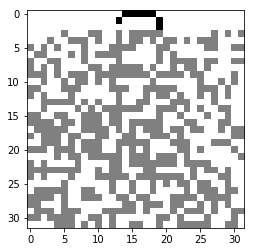

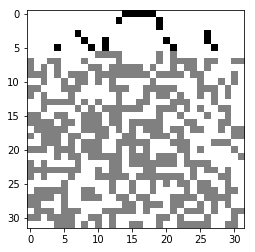

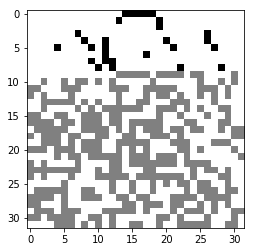

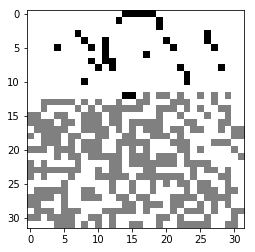

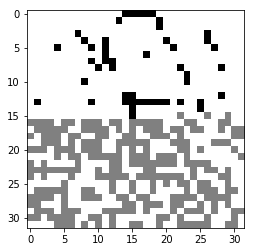

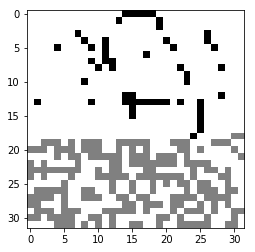

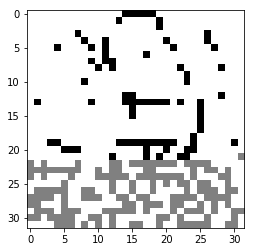

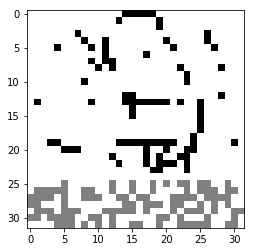

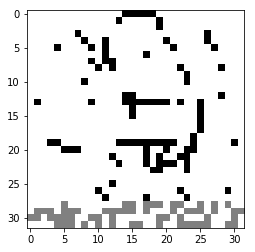

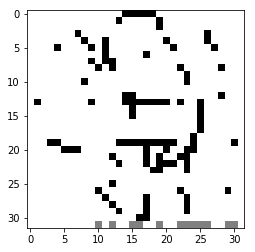

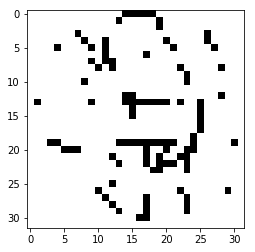

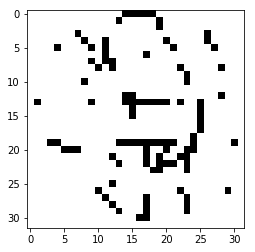

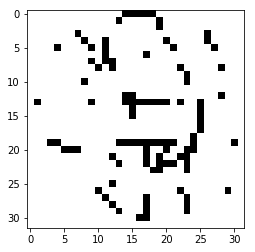

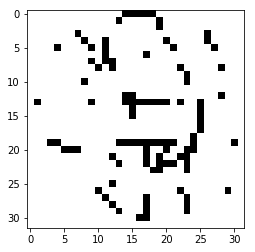

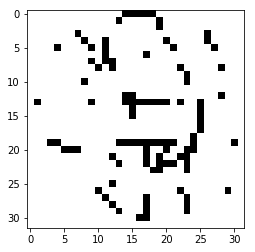

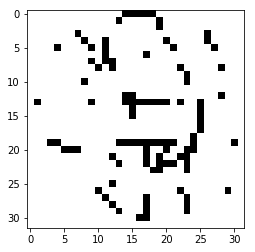

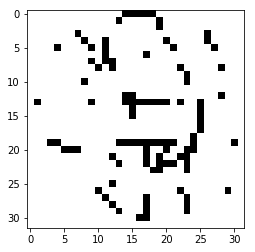

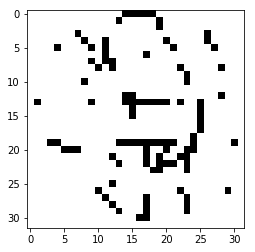

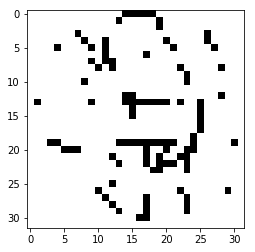

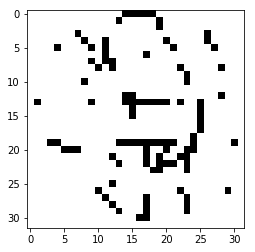

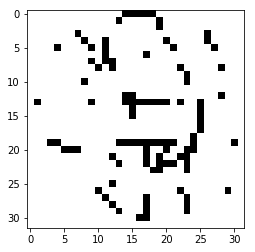

In [34]:
ran_p = np.random.randint(2, size=1024)
recover = hf.update_rule(ran_p,'async')[0]


In [18]:
recover = hf.update_rule(ran_p,'async')[0]


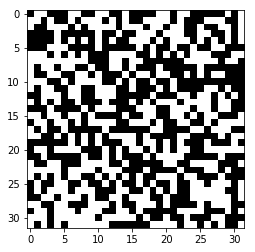

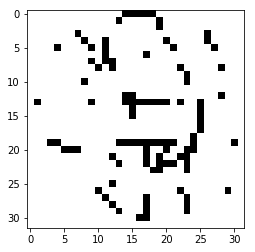

In [21]:
if (np.array_equal(ran_p, recover)):
    print('They are same')
hf.plot(ran_p)
hf.plot(recover)

They are same


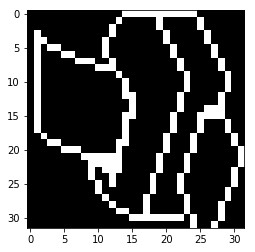

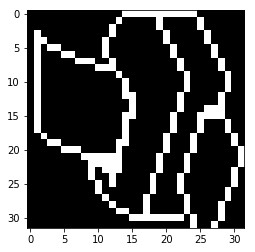

In [22]:
recover,_,energy =  hf.update_rule(p10,'sync')
if (np.array_equal(p1, recover)):
    print('They are same')
hf.plot(p1)
hf.plot(recover)

# energy

3 [-1606944.0, -1631244.0, -1631244.0]


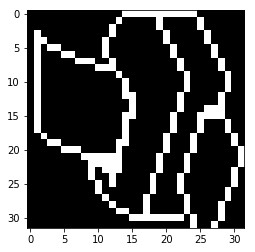

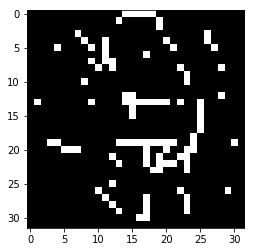

In [59]:
recover,iters, energy =  hf.update_rule(p10,'async')
print(iters, energy)
if (np.array_equal(p1, recover)):
    print('They are same')
hf.plot(p1)
hf.plot(recover)

Text(0.5, 1.0, 'Energy changes for p10 with async update')

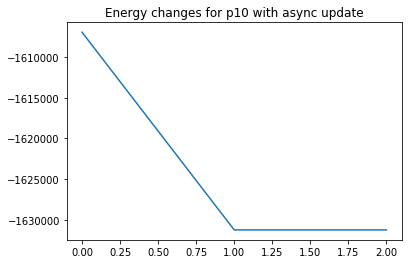

In [60]:
e =  [-1606944.0, -1631244.0, -1631244.0]
plt.plot(e)
plt.title('Energy changes for p10 with async update')

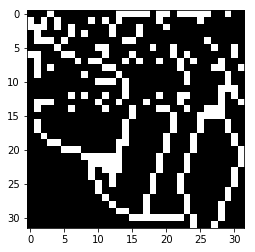

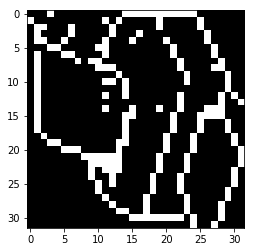

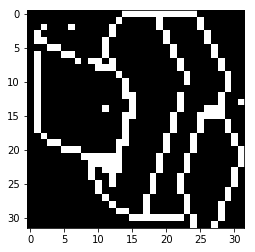

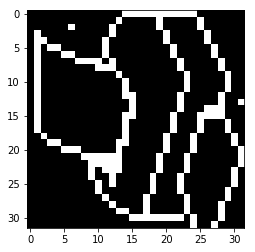

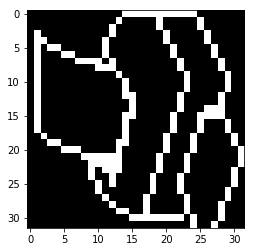

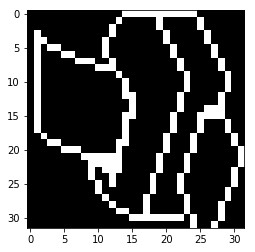

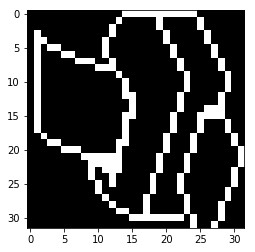

7 [-1056652.0, -1326924.0, -1438352.0, -1454956.0, -1467212.0, -1470864.0, -1470864.0]
They are same


In [61]:
recover,iters, energy =  hf.update_rule(p10,'random')
print(iters, energy)
if (np.array_equal(p1, recover)):
    print('They are same')
#hf.plot(p1)
#hf.plot(recover)

Text(0.5, 1.0, 'Energy changes for p10 with random update')

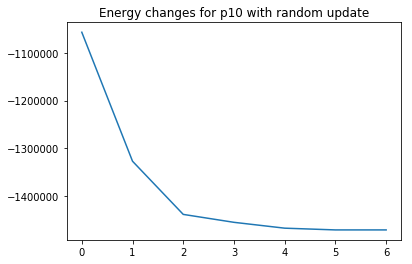

In [62]:
plt.plot(energy)
plt.title('Energy changes for p10 with random update')

Can not recover


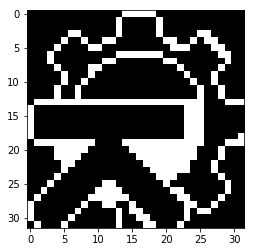

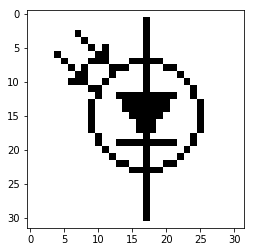

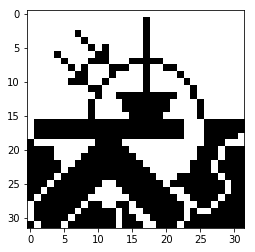

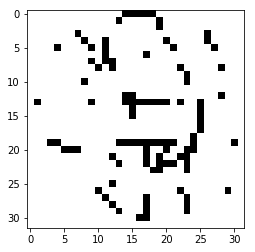

In [63]:
recover =  hf.update_rule(p11,'sync')[0]
if (np.array_equal(p2, recover)):
    print('The mixture is recovered to p2 ')
elif (np.array_equal(p3, recover)):
    print('The mixture is recovered to p3 ')
else:
    print('Can not recover')
    
hf.plot(p2)
hf.plot(p3)
hf.plot(p11)
hf.plot(recover)

3 [-776396.0, -1395344.0, -1395344.0]
The mixture is recovered to p2 


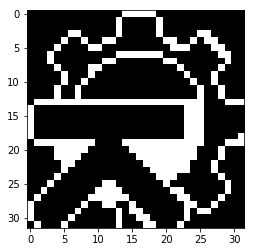

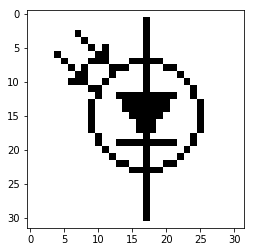

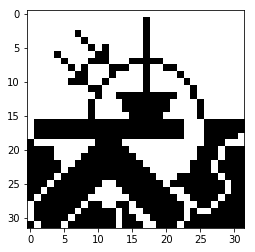

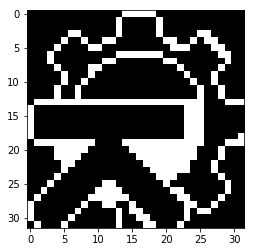

In [64]:
recover,iters,energy =  hf.update_rule(p11,'async')
print(iters, energy)
if (np.array_equal(p2, recover)):
    print('The mixture is recovered to p2 ')
elif (np.array_equal(p3, recover)):
    print('The mixture is recovered to p3 ')
else:
    print('Can not recover')
    
hf.plot(p2)
hf.plot(p3)
hf.plot(p11)
hf.plot(recover)

Text(0.5, 1.0, 'Energy changes for p11 with async update')

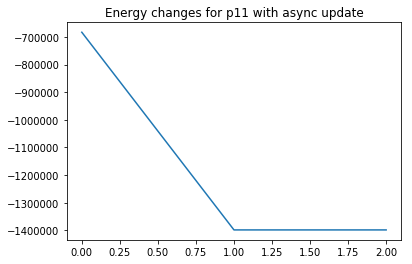

In [65]:
e = [-682988.0, -1398416.0, -1398416.0]
plt.plot(e)
plt.title('Energy changes for p11 with async update')

# energy with random weights and symmetric random weights 

# change the function "random_w(N)" to get symmetric


In [76]:

hf = Hopfield(8)
hf.fit(patterns, scaling= False, random_w = True)

Old pattern was  [-1. -1. -1. -1. -1.  1. -1. -1.] updated pattern is [ 1. -1.  1.  1.  1. -1. -1. -1.] iterations is 2


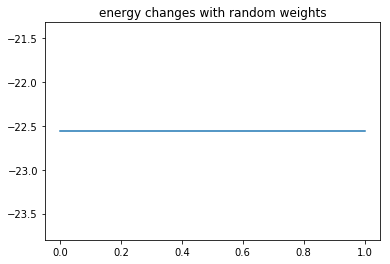

In [77]:
recover, iters, energy = hf.update_rule(x2,'async')
print('Old pattern was ', x2 ,'updated pattern is' ,recover,'iterations is',iters)
plt.plot(energy)
plt.title('energy changes with random weights')
if (np.array_equal(x, recover)):
    print('They are same')

In [68]:
hf = Hopfield(1024)
hf.fit(patterns3, scaling= False, random_w = True)

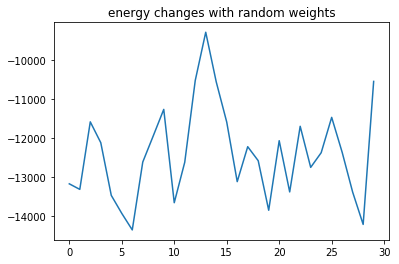

In [69]:
recover, iters, energy = hf.update_rule(p10,'async')
if (np.array_equal(p10, recover)):
        print('They are same')
plt.plot(energy)
plt.title('energy changes with random weights')
plt.show()    

# 3.5 capacity

In [ ]:
p4 = Data[4].copy()
p5 = Data[5].copy()
p6 = Data[6].copy()
p7 = Data[7].copy()

patterns4567 = []
for i in range(4):
    patterns4567.append(Data[:(i+4)].copy())
 

In [ ]:
patterns4567[0].shape

In [ ]:
i = 0
hf = Hopfield(1024)
hf.fit(patterns4567[i], scaling= False)
for j in range(i+4):
    recover,iters,energy =  hf.update_rule(patterns4567[i][j],'async')
    if np.array_equal(patterns4567[i][j],recover):
        print('can recover p',j )
    hf.plot(recover)
    
hf.plot(p1)
hf.plot(p2)
hf.plot(p3)
hf.plot(p4)    

In [ ]:
recover,iters,energy =  hf.update_rule(p11,'async')
hf.plot(recover)

In [ ]:
i = 1
hf = Hopfield(1024)
hf.fit(patterns4567[i], scaling=False)
for j in range(i+4):
    recover,iters,energy = hf.update_rule(patterns4567[i][j],'async')
    if np.array_equal(patterns4567[i][j],recover):
        print('can recover p',j )
    hf.plot(recover)

#  random patterns test 

In [78]:
def distort_data(pattern,percentage):
    dim = pattern.size
    dist = int(dim*percentage)
    subDist = pattern[:dist]
    #print(pattern)
    distPattern=np.copy(pattern)
    np.random.shuffle(distPattern[:dist])    
    return distPattern

def calc_error(true_pattern, dist_pattern):
    res = np.multiply(dist_pattern, true_pattern)
    return len(res[res<0])/len(recalled)*100


In [79]:
def create_random_data(dim):
    training_data = np.random.randn(dim,1024)
    training_data[training_data > 0] = 1
    training_data[training_data <= 0] = -1
    return training_data

In [80]:
create_random_data(3)

array([[ 1., -1., -1., ...,  1.,  1., -1.],
       [-1.,  1., -1., ...,  1., -1., -1.],
       [-1., -1.,  1., ..., -1., -1.,  1.]])

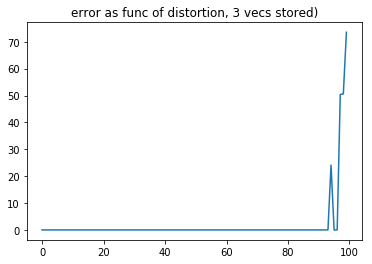

In [81]:
dim = 3
hp_cap = Hopfield(1024)
trainingData = create_random_data(dim)
hp_cap.fit(trainingData)
errors = []
for percentage in range(100):
    percentage = percentage/100 + 0.01
    dist_pattern = distort_data(trainingData[0], percentage)
    recalled = hp_cap.update_rule(dist_pattern)[0]
    errors.append(calc_error(trainingData[0], recalled))
plt.plot(errors)
plt.title("error as func of distortion, {} vecs stored)".format(dim))
plt.show()

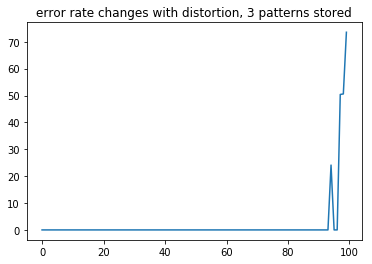

In [82]:
plt.plot(errors)
plt.title("error rate changes with distortion, {} patterns stored".format(dim))
plt.show()

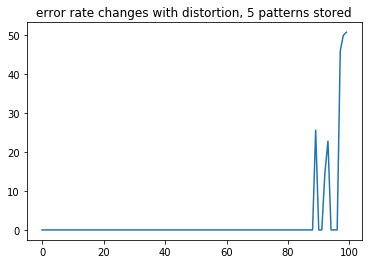

In [83]:
dim = 5
hp_cap = Hopfield(1024)
trainingData = create_random_data(dim)
hp_cap.fit(trainingData)
errors = []
for percentage in range(100):
    percentage = percentage/100 + 0.01
    dist_pattern = distort_data(trainingData[0], percentage)
    recalled = hp_cap.update_rule(dist_pattern)[0]
    errors.append(calc_error(trainingData[0], recalled))
plt.plot(errors)
plt.title("error rate changes with distortion, {} patterns stored".format(dim))
plt.show()

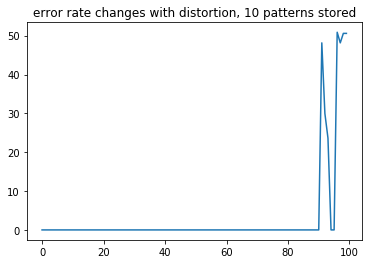

In [84]:
dim = 10
hp_cap = Hopfield(1024)
trainingData = create_random_data(dim)
hp_cap.fit(trainingData)
errors = []
for percentage in range(100):
    percentage = percentage/100 + 0.01
    dist_pattern = distort_data(trainingData[0], percentage)
    recalled = hp_cap.update_rule(dist_pattern)[0]
    errors.append(calc_error(trainingData[0], recalled))
plt.plot(errors)
plt.title("error rate changes with distortion, {} patterns stored".format(dim))
plt.show()

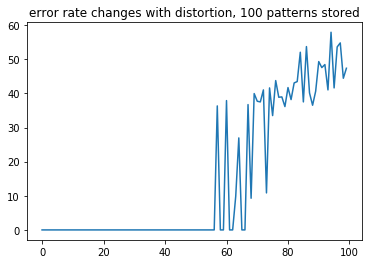

In [85]:
dim = 100
hp_cap = Hopfield(1024)
trainingData = create_random_data(dim)
hp_cap.fit(trainingData)
errors = []
for percentage in range(100):
    percentage = percentage/100 + 0.01
    dist_pattern = distort_data(trainingData[0], percentage)
    recalled = hp_cap.update_rule(dist_pattern)[0]
    errors.append(calc_error(trainingData[0], recalled))
plt.plot(errors)
plt.title("error rate changes with distortion, {} patterns stored".format(dim))
plt.show()

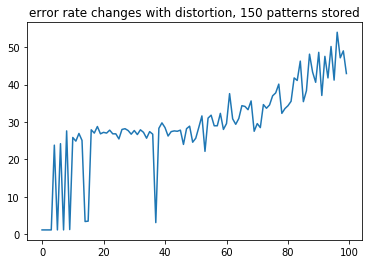

In [86]:
dim = 150
hp_cap = Hopfield(1024)
trainingData = create_random_data(dim)
hp_cap.fit(trainingData)
errors = []
for percentage in range(100):
    percentage = percentage/100 + 0.01
    dist_pattern = distort_data(trainingData[0], percentage)
    recalled = hp_cap.update_rule(dist_pattern)[0]
    errors.append(calc_error(trainingData[0], recalled))
plt.plot(errors)
plt.title("error rate changes with distortion, {} patterns stored".format(dim))
plt.show()

# random (300,100)

In [88]:
np.random.seed(1000)
def create_random_data():
    training_data = np.random.randn(300,100)
    training_data[training_data > 0] = 1
    training_data[training_data <= 0] = -1
    return training_data

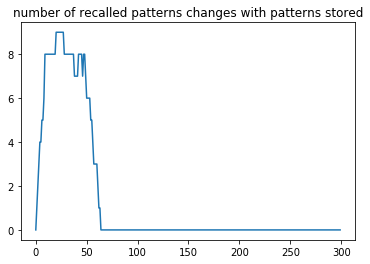

In [89]:
#### no noise
hf_300 = Hopfield(100)
trainingData = create_random_data()

recalled_num = []
for i in range(300):
    hf_300.fit(trainingData[:i+1])
    num = 0
   # dist_pattern = distort_data(trainingData[0], percentage)
    for j in range(i):
        recall = hf_300.update_rule(trainingData[j])[0]
        if np.array_equal(recall, trainingData[j]):
            num += 1
    recalled_num.append(num)   
   # errors.append(calc_error(trainingData[0], recall))
plt.plot(recalled_num)
plt.title("number of recalled patterns changes with patterns stored")
plt.show()

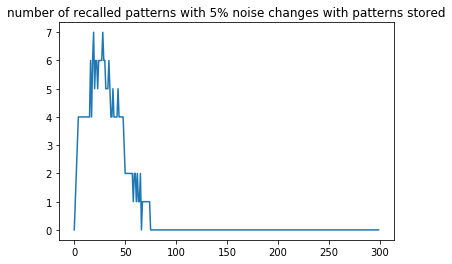

In [90]:
### with 5% nosie

hf_300 = Hopfield(100)
trainingData = create_random_data()

recalled_num = []
for i in range(300):
    hf_300.fit(trainingData[:i+1])
    num = 0
    for j in range(i):
        dist_pattern = distort_data(trainingData[j], 0.05)
        recall = hf_300.update_rule(dist_pattern)[0]
        if np.array_equal(recall, trainingData[j]):
            num += 1
    recalled_num.append(num)   
   # errors.append(calc_error(trainingData[0], recall))
plt.plot(recalled_num)
plt.title("number of recalled patterns with 5% noise changes with patterns stored")
plt.show()

# random (300,100) with a bias

In [91]:
np.random.seed(1000)
def create_random_data():
    training_data = np.random.randn(300,100)
    training_data[training_data+0.5 > 0] = 1
    training_data[training_data+0.5 <= 0] = -1
    return training_data

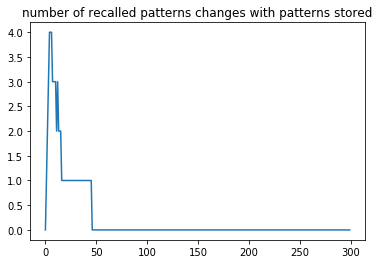

In [92]:
hf_300 = Hopfield(100)
trainingData = create_random_data()

recalled_num = []
for i in range(300):
    hf_300.fit(trainingData[:i+1])
    num = 0
   # dist_pattern = distort_data(trainingData[0], percentage)
    for j in range(i):
        recall = hf_300.update_rule(trainingData[j])[0]
        if np.array_equal(recall, trainingData[j]):
            num += 1
    recalled_num.append(num)   
   # errors.append(calc_error(trainingData[0], recall))
plt.plot(recalled_num)
plt.title("number of recalled patterns changes with patterns stored")
plt.show()

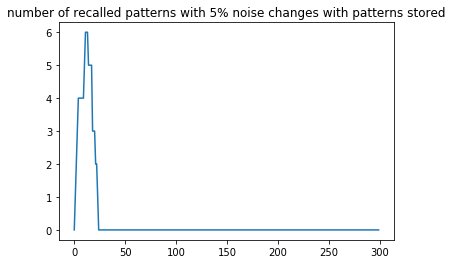

In [93]:
hf_300 = Hopfield(100)
trainingData = create_random_data()

recalled_num = []
for i in range(300):
    hf_300.fit(trainingData[:i+1])
    num = 0
    for j in range(i):
        dist_pattern = distort_data(trainingData[j], 0.05)
        recall = hf_300.update_rule(dist_pattern)[0]
        if np.array_equal(recall, trainingData[j]):
            num += 1
    recalled_num.append(num)   
   # errors.append(calc_error(trainingData[0], recall))
plt.plot(recalled_num)
plt.title("number of recalled patterns with 5% noise changes with patterns stored")
plt.show()

# 3.6 sparse patterns

In [7]:
def calc_sparse_error(true_pattern, recalled):
    res = np.subtract(true_pattern, recalled)
    return np.count_nonzero(res)/len(res)*100

In [8]:
def show_sparse(X, activity, patterns_no):
    hf_sparse = Hopfield(1024)
    patterns = X[0:patterns_no].copy()
    #patterns[patterns<0] = 0
    hf_sparse.fit(patterns, scaling=True)
    error = []
    biaslist = []
    energy = []
    bias = [0,0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for bias in bias:
        recalled,iters,ener = hf_sparse.update_rule(patterns[0], rule = 'sparse', theta = bias)
        error.append(calc_sparse_error(patterns[0],recalled))
        biaslist.append(bias)
        energy.append(ener)
        hf_sparse.plot(recalled)
    return error, biaslist, energy

In [9]:
from scipy.sparse import random
from scipy import stats

class CustomRandomState(np.random.RandomState):
    def randint(self, k):
        i = np.random.randint(k)
        return i - i % 2
np.random.seed(12345)
rs = CustomRandomState()
rvs = stats.bernoulli(1).rvs
S = random(300, 1024, density=0.1, random_state=rs, data_rvs=rvs)

In [ ]:
np.count_nonzero(S.A[80])

In [ ]:
S.A[99]

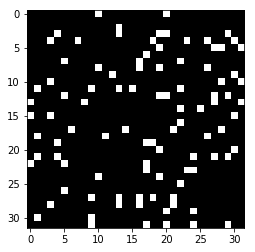

In [10]:
X = S.A[:1]
hf_sparse = Hopfield(1024)
hf_sparse.fit(X,scaling=True,sparse=True, activity=0.1)
hf_sparse.plot(S.A[0])

In [ ]:
recall = hf_sparse.update_rule(X[0], rule = 'sparse', theta = 0.1)[0]


In [ ]:
hf_sparse.plot(recall)

In [ ]:
e1, biaslist, energy = show_sparse(S.A, activity=0.1, patterns_no=3)

In [ ]:
plt.plot(biaslist, e1)
plt.title("error % as function of bias, {}% activity. {} pictures stored".format(10, 3))
plt.show()

In [ ]:
e2, biaslist, energy = show_sparse(S.A, activity=0.1, patterns_no=10)

In [ ]:
plt.plot(biaslist, e2)
plt.title("error % as function of bias, {}% activity. {} pictures stored".format(10, 10))
plt.show()

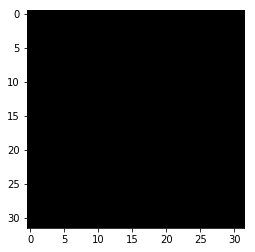

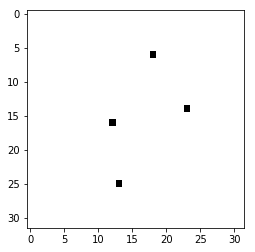

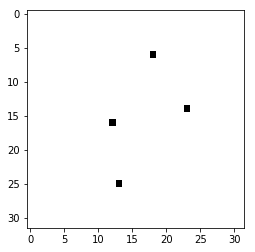

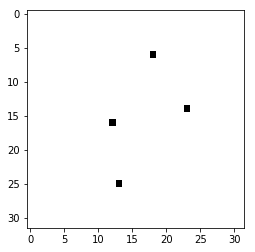

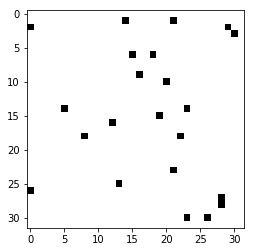

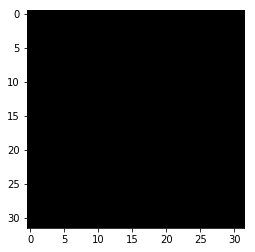

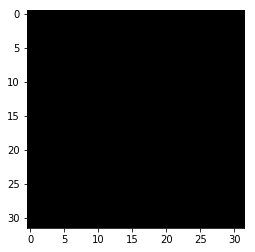

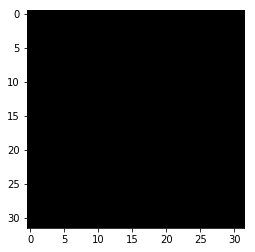

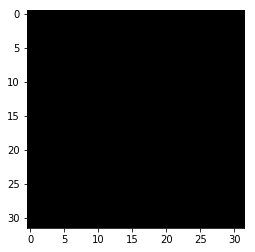

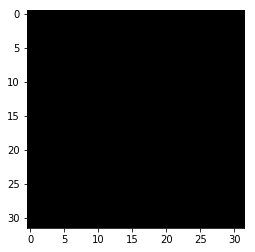

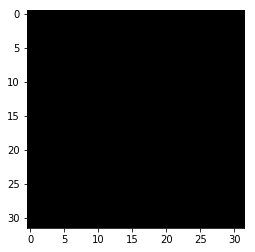

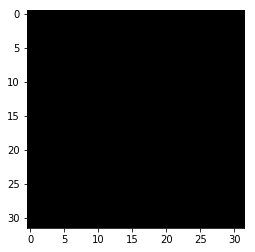

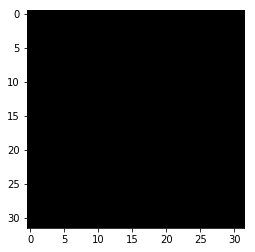

In [11]:
e2, biaslist, energy = show_sparse(S.A, activity=0.1, patterns_no=50)

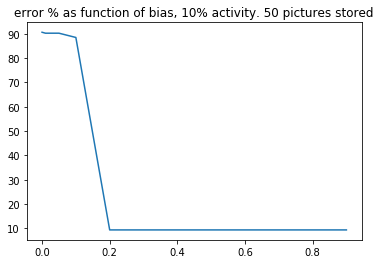

In [12]:
plt.plot(biaslist, e2)
plt.title("error % as function of bias, {}% activity. {} pictures stored".format(10, 50))
plt.show()

In [ ]:
e2, biaslist, energy = show_sparse(S.A, activity=0.1, patterns_no=100)

In [ ]:
plt.plot(biaslist, e2)
plt.title("error % as function of bias, {}% activity. {} pictures stored".format(10, 100))
plt.show()

In [ ]:
energy

In [ ]:
from scipy.sparse import random
from scipy import stats

class CustomRandomState(np.random.RandomState):
    def randint(self, k):
        i = np.random.randint(k)
        return i - i % 2
np.random.seed(12345)
rs = CustomRandomState()
rvs = stats.bernoulli(1).rvs
S = random(300, 1024, density=0.05, random_state=rs, data_rvs=rvs)
X = S.A

In [ ]:
hf_sparse = Hopfield(1024)
hf_sparse.plot(S.A[0])

In [ ]:
e005, biaslist, energy = show_sparse(X, activity=0.05, patterns_no=3)

In [ ]:
plt.plot(biaslist, e005)
plt.title("error % as function of bias, {}% activity. {} pictures stored".format(5, 3))
plt.show()

In [ ]:
e005, biaslist, energy = show_sparse(X, activity=0.05, patterns_no=10)

In [ ]:
plt.plot(biaslist, e005)
plt.title("error % as function of bias, {}% activity. {} pictures stored".format(5, 10))
plt.show()

In [ ]:
e006, biaslist, energy = show_sparse(X, activity=0.05, patterns_no=150)

In [ ]:
plt.plot(biaslist, e006)
plt.title("error % as function of bias, {}% activity. {} pictures stored".format(5, 100))
plt.show()

In [ ]:
energy

In [13]:
from scipy.sparse import random
from scipy import stats

class CustomRandomState(np.random.RandomState):
    def randint(self, k):
        i = np.random.randint(k)
        return i - i % 2
np.random.seed(12345)
rs = CustomRandomState()
rvs = stats.bernoulli(1).rvs
S = random(300, 1024, density=0.01, random_state=rs, data_rvs=rvs)
X = S.A

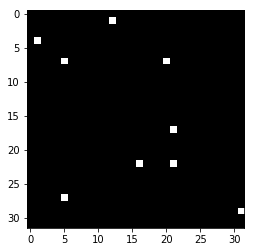

In [14]:
X = S.A[:1]
hf_sparse = Hopfield(1024)
hf_sparse.plot(S.A[0])

In [ ]:
e001, biaslist, energy = show_sparse(X, activity=0.01, patterns_no=5)

In [ ]:
plt.plot(biaslist, e001)
plt.title("error % as function of bias, {}% activity. {} pictures stored".format(1, 5))

plt.show()


In [ ]:
energy

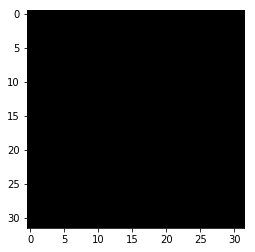

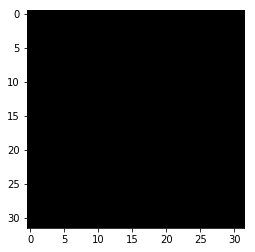

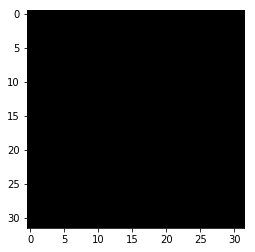

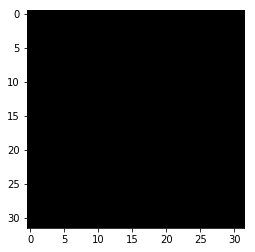

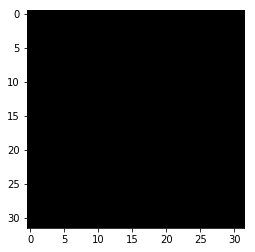

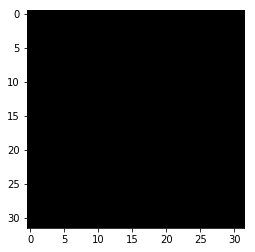

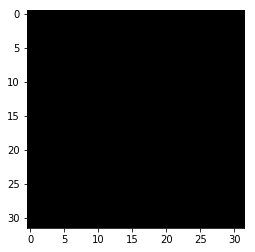

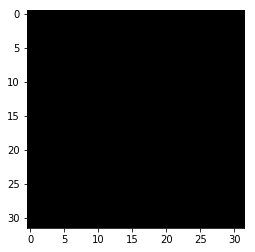

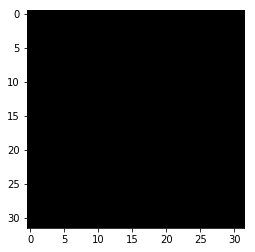

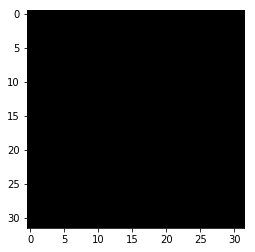

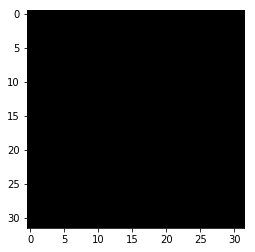

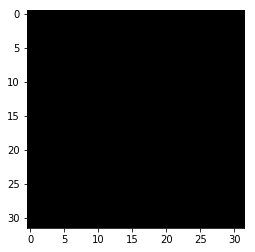

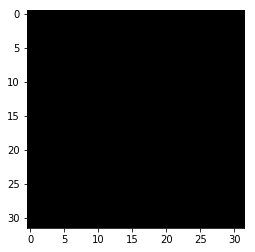

In [15]:
e4, biaslist, energy = show_sparse(X, activity=0.1, patterns_no=10)


In [ ]:
plt.plot(biaslist, e4)
plt.title("error % as function of bias, {}% activity. {} pictures stored".format(10, 10))
plt.show()

In [ ]:
e4, biaslist = show_sparse(activity=0.1, patterns_no=7)

# Another way to do sparse (100 units)

In [ ]:
from scipy.sparse import random
from scipy import stats

class CustomRandomState(np.random.RandomState):
    def randint(self, k):
        i = np.random.randint(k)
        return i - i % 2
np.random.seed(12345)
rs = CustomRandomState()
rvs = stats.bernoulli(1).rvs
S = random(300, 100, density=0.1, random_state=rs, data_rvs=rvs)

In [ ]:
X = S.A
hf_sparse = Hopfield(100)


In [ ]:
bias = [0,0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
max_num = []
for ind in range(len(bias)): 
    recalled_num = []
    for i in range(50):
        hf_sparse.fit(X[:i+1],scaling=True,sparse=True, activity=0.1)
        num = 0
        for j in range(i):
            #dist_pattern = distort_data(X[j], 0.05)
            recall = hf_sparse.update_rule(X[j],rule = 'sparse', theta = bias[ind])[0]
            if np.array_equal(X[j], recall):
                num += 1

        recalled_num.append(num)   
    max_num.append(np.max(recalled_num))



In [ ]:

plt.plot(bias, max_num)
plt.title("max number of patterns changes with bias, activity=0.1")

plt.show()

In [ ]:
max_num

In [ ]:
np.random.seed(1000)
S = random(300, 100, density=0.05, random_state=rs, data_rvs=rvs)
X = S.A
hf_sparse = Hopfield(100)


In [ ]:
bias = [0,0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
max_num = []
for ind in range(len(bias)): 
    recalled_num = []
    for i in range(50):
        hf_sparse.fit(X[:i+1],scaling=True,sparse=True, activity=0.1)
        num = 0
        for j in range(i):
            #dist_pattern = distort_data(X[j], 0.05)
            recall = hf_sparse.update_rule(X[j],rule = 'sparse', theta = bias[ind])[0]
            if np.array_equal(X[j], recall):
                num += 1

        recalled_num.append(num)   
    max_num.append(np.max(recalled_num))

plt.plot(bias, max_num)
plt.title("max number of patterns changes with bias, activity=0.05")
plt.show()

In [ ]:
max_num

In [ ]:
np.random.seed(1000)
S = random(300, 100, density=0.01, random_state=rs, data_rvs=rvs)
X = S.A
hf_sparse = Hopfield(100)

In [ ]:
bias = [0,0.005,0.01,0.02,0.05,0.1,0.2]
bias1 = [0,0.005,0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
max_num = []
for ind in range(len(bias)): 
    recalled_num = []
    for i in range(50):
        hf_sparse.fit(X[:i+1],scaling=True,sparse=True, activity=0.1)
        num = 0
        for j in range(i):
            #dist_pattern = distort_data(X[j], 0.05)
            recall = hf_sparse.update_rule(X[j],rule = 'sparse', theta = bias[ind])[0]
            if np.array_equal(X[j], recall):
                num += 1

        recalled_num.append(num)   
    max_num.append(np.max(recalled_num))



In [ ]:
max_num = [7, 21, 28, 24, 21, 21, 21,21,21,21,21,21,21,21]

In [ ]:
plt.plot(bias1, max_num)
plt.title("max number of patterns changes with bias, activity=0.01")
plt.show()